In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom
import os
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import pydicom
from skimage.io import imread
import seaborn as sns
from glob import glob
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go

/opt/homebrew/lib/python3.11/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
# Some constants 
INPUT_FOLDER = '/Applications/Work Space/python work space/projects/archive/'
patients_dcm = os.listdir(INPUT_FOLDER)
patients_dcm.sort()
patients_dcm[:10]

['000000.dcm',
 '000001.dcm',
 '000002.dcm',
 '000003.dcm',
 '000004.dcm',
 '000005.dcm',
 '000006.dcm',
 '000007.dcm',
 '000008.dcm',
 '000009.dcm']

### DICOM Dosyalarını Okuma

In [3]:
#Reading a DICOM Image
im = imageio.imread(INPUT_FOLDER + patients_dcm[0])

/var/folders/kw/3t8qd9fd6hlfbqdps6pvpchw0000gn/T/ipykernel_1423/3615563936.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(INPUT_FOLDER + patients_dcm[0])


### DICOM Nitelikleri

In [4]:
#DICOM Metadata
im.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055'),
      ('StudyDate', '20100227'),
      ('SeriesDate', '20100227'),
      ('AcquisitionDate', '20100227'),
      ('ContentDate', '20100227'),
      ('StudyTime', '161937.171'),
      ('SeriesTime', '162536.14 '),
      ('AcquisitionTime', '162203.028699 '),
      ('ContentTime', '162203.028699 '),
      ('Modality', 'CT'),
      ('Manufacturer', 'SIEMENS'),
      ('StudyDescription', 'CT CHEST W IV CONTRAST'),
      ('SeriesDescription', 'LUNG 3.0  B70f'),
      ('PatientName', 'C3N-00247'),
      ('PatientID', 'C3N-00247'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'F '),
      ('PatientAge', '077Y'),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.258626612405225511766549337110'),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.24

In [5]:
# The Attributes of the DICOM File
im.meta.keys()

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'AcquisitionDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'AcquisitionTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientAge', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])

### Belirli bir DICOM Özniteliğine Erişin

In [6]:
#The Modality Attribute
im.meta['Modality']

'CT'

### Matplotlib Kütüphanesini Kullanarak Görüntü Temsili

In [7]:
# Access the Pixel Data attribute
im.meta['PixelData']

b'Data converted to numpy array, raw data removed to preserve memory'

In [8]:
#print the image Numpy-array
im

Array([[ -668,  -780,  -823, ...,  -834,  -800,  -948],
       [ -715,  -637,  -654, ...,  -902, -1007, -1018],
       [ -690,  -548,  -538, ...,  -995,  -978,  -977],
       ...,
       [ -926,  -836,  -838, ...,  -868,  -938,  -899],
       [ -958,  -886,  -885, ...,  -803,  -950,  -943],
       [ -856,  -851,  -924, ...,  -836,  -889,  -877]], dtype=int16)

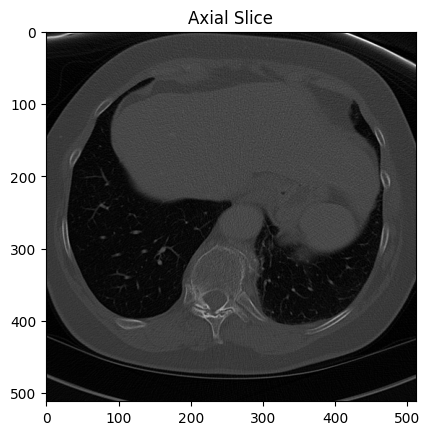

In [9]:
#Show the image with gray color-map
plt.imshow(im, cmap='gray')
#Add a title 
plt.title('Axial Slice')
plt.show()

### Çoklu Dilimleri Yığınlayın ve Okuyun

In [10]:
#Stacking 99 slices
vol = imageio.volread(INPUT_FOLDER + patients_dcm[0])
print(vol.shape)
type(vol)

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)
(99, 512, 512)


imageio.core.util.Array

In [11]:
#Access the first slice
vol[:,:,:]

Array([[[ -985,  -990,  -999, ..., -1017, -1008,  -971],
        [-1016,  -984,  -963, ..., -1000, -1009,  -999],
        [-1024, -1008,  -996, ...,  -979, -1021,  -987],
        ...,
        [ -920,  -942,  -944, ...,  -893,  -917,  -955],
        [ -871,  -879,  -905, ...,  -895,  -869,  -867],
        [ -876,  -855,  -873, ...,  -933,  -982,  -936]],

       [[ -982,  -989, -1020, ...,  -988,  -977,  -980],
        [-1015,  -969,  -980, ...,  -981,  -974, -1016],
        [-1020,  -978,  -972, ...,  -988,  -993, -1015],
        ...,
        [ -880,  -854,  -924, ...,  -909,  -829,  -829],
        [ -907,  -868,  -928, ...,  -909,  -901,  -894],
        [ -885,  -850,  -899, ...,  -977,  -964,  -991]],

       [[-1022, -1011,  -983, ..., -1013,  -980,  -967],
        [-1022, -1005, -1012, ...,  -948,  -966, -1008],
        [ -991,  -965,  -993, ...,  -964, -1011,  -996],
        ...,
        [ -858,  -899,  -950, ...,  -939,  -868,  -827],
        [ -948,  -914,  -918, ...,  -968,  -9

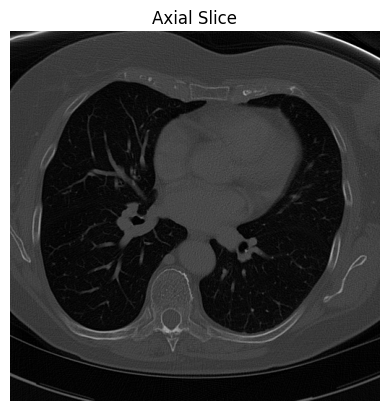

In [12]:
#Show the first slice.
plt.imshow(vol[50,:,:], cmap='gray')
#Don't show the axis
plt.axis('off')
#Add a title
plt.title('Axial Slice')
plt.show()

In [13]:
vol.shape

(99, 512, 512)

In [14]:
#Introduce the metadata of the stacked images.
vol.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.397047382026069586801778973091'),
      ('StudyDate', '20100227'),
      ('SeriesDate', '20100227'),
      ('AcquisitionDate', '20100227'),
      ('ContentDate', '20100227'),
      ('StudyTime', '161937.171'),
      ('SeriesTime', '162536.14 '),
      ('AcquisitionTime', '162208.162527 '),
      ('ContentTime', '162208.162527 '),
      ('Modality', 'CT'),
      ('Manufacturer', 'SIEMENS'),
      ('StudyDescription', 'CT CHEST W IV CONTRAST'),
      ('SeriesDescription', 'LUNG 3.0  B70f'),
      ('PatientName', 'C3N-00247'),
      ('PatientID', 'C3N-00247'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'F '),
      ('PatientAge', '077Y'),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.258626612405225511766549337110'),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.24

### "Shape", "Sampling" ve "PixelAspectRatio" niteliklerini anlaşılması

#### Number of Slices

In [15]:
# The shape of the stacked images in each plane
# (Axial, Coronal, and Sagittal, respectively)
n0, n1, n2 = vol.shape

print("Number of Slices:\n\t", "Axial=", n0, "Slices\n\t",
                               "Coronal=", n1, "Slices\n\t",
                               "Sagittal=", n2, "Slices")




Number of Slices:
	 Axial= 99 Slices
	 Coronal= 512 Slices
	 Sagittal= 512 Slices


#### Sampling

In [16]:
# The sampling of the stacked images in each plane
# (Axial, Coronal, and Sagittal, respectively)
d0, d1, d2 = vol.meta['sampling'] # in mm
# Print the output
print("Sampling:\n\t", "Axial=", d0, "mm\n\t",
                               "Coronal=", d1, "mm\n\t",
                               "Sagittal=", d2, "mm")

Sampling:
	 Axial= 3.0 mm
	 Coronal= 0.564453125 mm
	 Sagittal= 0.564453125 mm


#### Pixel Aspect Ratio

In [17]:
# The aspect ratio along the axial plane
axial_asp = d1/d2
# The aspect ratio along the sagittal plane
sagittal_asp = d0/d1
# The aspect ratio along the coronal plane
coronal_asp = d0/d2
# Print the output
print("Pixel Aspect Ratio:\n\t", "Axial=", axial_asp, "\n\t",
                               "Coronal=", coronal_asp, "\n\t",
                               "Sagittal=", sagittal_asp)

Pixel Aspect Ratio:
	 Axial= 1.0 
	 Coronal= 5.314878892733564 
	 Sagittal= 5.314878892733564


### Üç dilimin görüntüleri

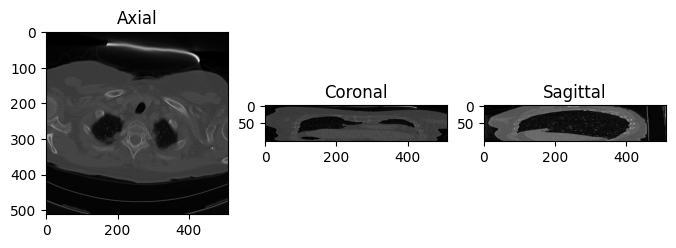

In [18]:
# Define a figure with 1 row and 3 columns of plots to show the
# images along the three planes
fig, ax = plt.subplots(1, 3, figsize=(8, 8))
# Axial Plane: show the 10th slice
ax[0].imshow(vol[10,:,:], cmap='gray')
#ax[0].axis('off')
ax[0].set_title('Axial')

# Coronal Plane: show the slice 100
ax[1].imshow(vol[:,100,:],cmap='gray')
#ax[1].axis('off')
ax[1].set_title('Coronal')

# Sagittal Plane: show the slice 100
ax[2].imshow(vol[:,:,100], cmap='gray')
#ax[2].axis('off')
ax[2].set_title('Sagittal')
plt.show()


#### Görüş alanı

In [19]:
print("Field of View:\n\t", "Axial=", n0*d0, "mm\n\t",
                            "Coronal=", n1*d1, "mm\n\t",
                            "Sagittal=", n2*d2, "mm")

Field of View:
	 Axial= 297.0 mm
	 Coronal= 289.0 mm
	 Sagittal= 289.0 mm


In [20]:
# Add a slider that starts with 0 and ends at the number of
# slices along the axial plane, n0=99.
@widgets.interact(axial_slice=(0,n0-1))
# Define the function that shows the images of the specified slice number.
# It starts with the 10th slice. And you can scroll over any slice
# using the slider.
def axial_slicer(axial_slice=50):
  fig, ax = plt.subplots(1, 1, figsize=(8, 8))
  # Show the image of the specified slice number in 'gray' color-map
  # and axial aspect ratio
  ax.imshow(vol[axial_slice,:,:], cmap='gray', aspect=axial_asp)
  # Don't show the axis
  ax.axis('off')

interactive(children=(IntSlider(value=50, description='axial_slice', max=98), Output()), _dom_classes=('widget…

### Üç göürntüden Slice Slice Gösterme

In [21]:

n0, n1, n2 = vol.shape

@widgets.interact(axial_slice=(0,n0-1), coronal_slice=(0,n1-1),\
                  sagittal_slice=(0,n2-1))
def slicer(axial_slice, coronal_slice, sagittal_slice=100):
  fig, ax = plt.subplots(1, 3, figsize=(12, 12))

  # Show the specfied slice on the axial plane with 'gray' color-map
  # and axial aspect ratio.
  ax[0].imshow(vol[axial_slice,:,:], cmap='gray', aspect= axial_asp)
  ax[0].axis('off')
  ax[0].set_title('Axial')

  # Show the specified slice on the coronal plane with 'gray' color-map
  # and coronal aspect ratio.
  ax[1].imshow(vol[:,coronal_slice,:],cmap='gray', aspect= coronal_asp)
  ax[1].axis('off')
  ax[1].set_title('Coronal')

  # Show the specified slice on the sagittal plane with 'gray' color-map
  # and sagittal aspect ratio.
  ax[2].imshow(vol[:,:,sagittal_slice], cmap='gray', aspect= sagittal_asp)
  ax[2].axis('off')
  ax[2].set_title('Sagittal')

interactive(children=(IntSlider(value=49, description='axial_slice', max=98), IntSlider(value=255, description…

# Image Segmentation

In [22]:
image = imageio.volread(INPUT_FOLDER + patients_dcm[10])

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)


### Image dilimini çiz

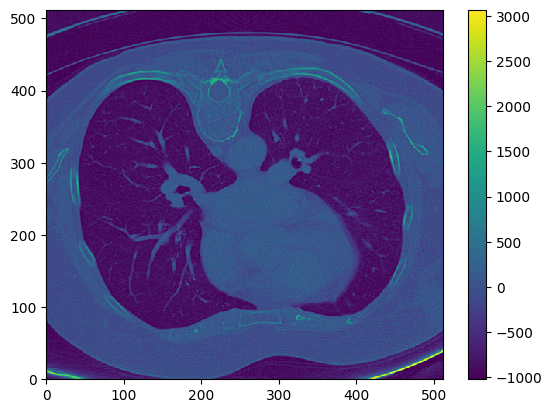

In [23]:
plt.pcolormesh(image[50,:,:]) # 10. hasta 50.  axial katman 
plt.colorbar()


## Hounsfield Birimleri (HU)

BT taramasının piksel değerleri Hounsfield Birimleri cinsinden ifade edilmiştir çünkü BT taramalarındaki ölçü birimi, bir radyo yoğunluğu ölçüsü olan Hounsfield Birimidir (HU). BT tarayıcıları, bunu doğru bir şekilde ölçmek için dikkatlice kalibre edilir.


HU değerleri sayesinde dokuların BT görüntülerinde farklı pixellerde algılanmasına sebep olmaktadır. Buda BT görüntülerinde dokuların, kemiklerin ve organların daha belirgin yapısını gözlemede olanak sağlamaktadır. Böylece gözle görünmeyen pixel faklılıklarını da resim işleme sırasında daha belirgin hale getirip bölge işartelemelri ve segmentsyonları yapılmasına olanak sağlamaktadır.

### Verileri Modifiye Etmek
İlk olarak, havanın vücuttaki diğer maddelerden önemli ölçüde daha az HU olduğudur, bu nedenle "eşik"  eğeri ile maske uyguluyoruz. Alt limit olarak -320 HU kullanalım:

In [24]:
image < -320

Array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [25]:
mask = image < -320

In [26]:
mask.shape

(99, 512, 512)

#### Mask Görselleştirme 

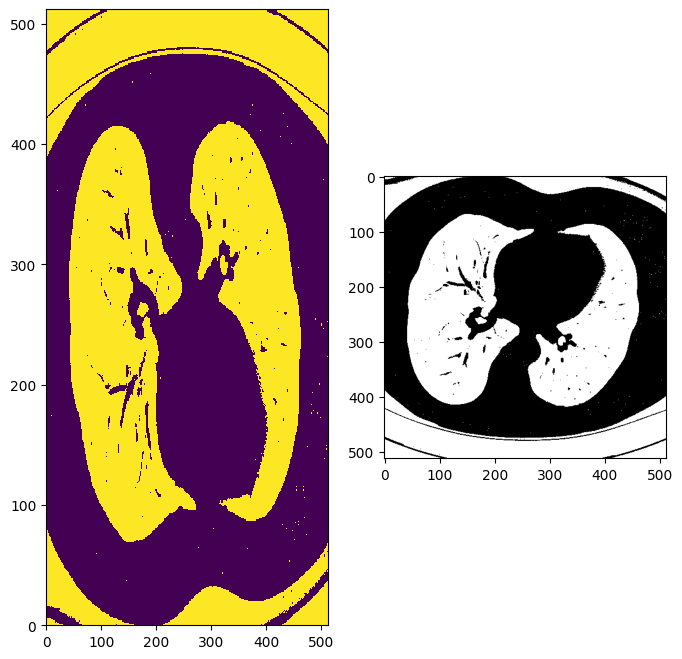

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8))

ax[0].pcolormesh(mask[50,:,:])

ax[1].imshow(mask[50,:,:], cmap='gray')


Dış sınırı kaldırmak için "clear_border" methodu kullanılır

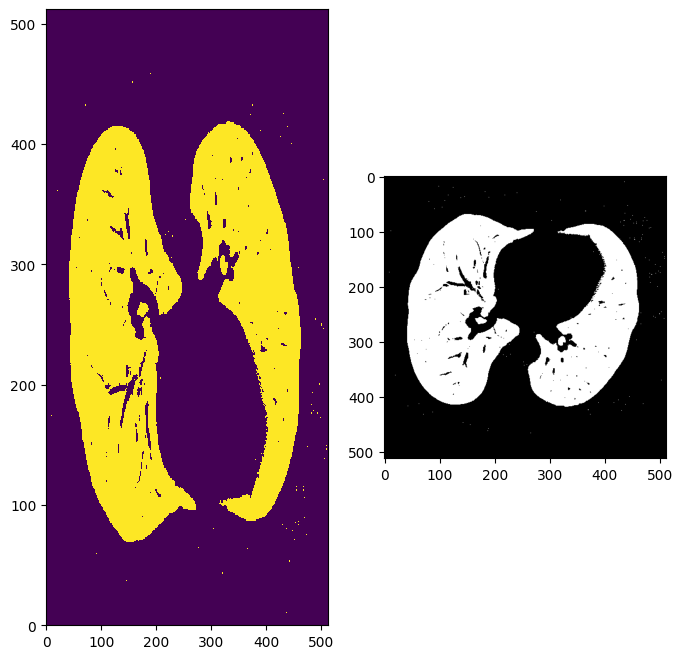

In [28]:
mask = np.vectorize(clear_border, signature='(n,m)->(n,m)')(mask)
#plt.pcolormesh(mask[50])

fig, ax = plt.subplots(1, 2, figsize=(8, 8))

ax[0].pcolormesh(mask[50,:,:])

ax[1].imshow(mask[50,:,:], cmap='gray')


"lable" fonksiyonunu kullanarak her ayrı birime farklı bir tamsayı değeri vereceğiz.

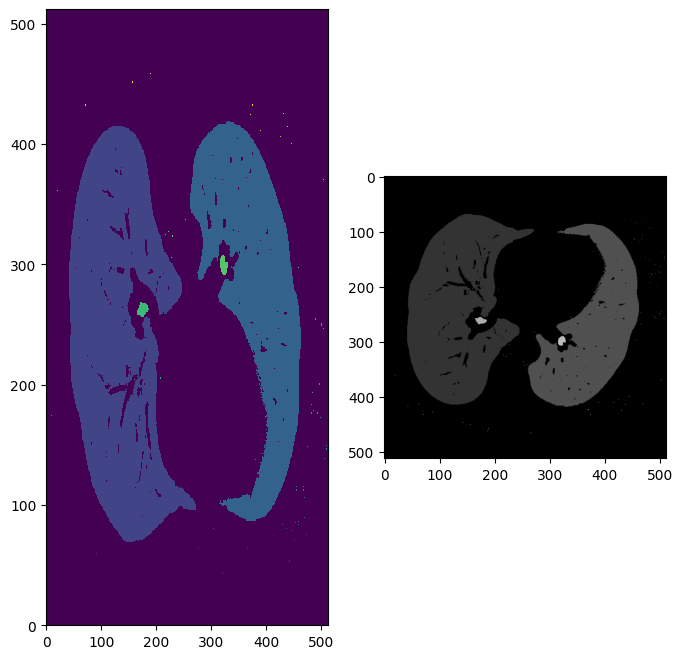

In [29]:
mask_labeled = np.vectorize(label, signature='(n,m)->(n,m)')(mask)
#plt.pcolormesh(mask_labeled[50])
#plt.colorbar()

fig, ax = plt.subplots(1, 2, figsize=(8, 8))

ax[0].pcolormesh(mask_labeled[50,:,:])

ax[1].imshow(mask_labeled[50,:,:], cmap='gray')


Şimdi biraz sezgisel olmayan bir şey için. Görüntünün her dilimi için en büyük üç alanı korumak istiyoruz. Ve bu üç alandan ikisi bizim akcğerlerimizi temsil etmektedir. Ve bu iki akciğer alanı belirlemke için izlenilen yol şu şekildedir.

Bazı dilimlerde akciğerlerden biri masadan daha büyük olabilir.
Bazı dilimlerde akciğerlerden biri masadan daha küçük olabilir.
Sadece en büyük iki dilimi alırsak, masayı ve ciğerlerden birini alabiliriz. Şimdilik ilk 3'ü ele alalım. Aşağıdaki işlev, 3B görüntünün tek bir diliminde çalışacak şekilde tasarlanmıştır:

In [30]:
slc = mask_labeled[50]
rps = regionprops(slc)
areas = [r.area for r in rps]
np.argsort(areas)[::-1]

array([ 20,  32,  70,  76,  95,  68,  17,  59,  25,  42,  41,  44,  28,
        29,  30,  47,  31,  46,  45,  43,  40,  33,  34,  35,  36,  27,
        38,  39,  37, 104,  26,  11,   1,   2,   3,   4,   5,   6,   7,
         8,   9,  10,  12,  49,  13,  14,  15,  16,  18,  19,  21,  22,
        23,  24,  48,  52,  50,  79,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  96,  97,  98,  99, 100, 101,
       102,  80,  78,  51,  77, 103,  53,  54,  55,  56,  57,  58,  60,
        61,  62,  63,  64,  65,  66,  67,  69,  71,  72,  73,  74,  75,
         0])

In [31]:
slc = mask_labeled[50]
rps = regionprops(slc)
areas = [r.area for r in rps]
idxs = np.argsort(areas)[::-1] # we want largest to smallest

In [32]:
new_slc = np.zeros_like(slc)

In [33]:
new_slc = np.zeros_like(slc)
for i in idxs[:3]:
    new_slc[tuple(rps[i].coords.T)] = i+1

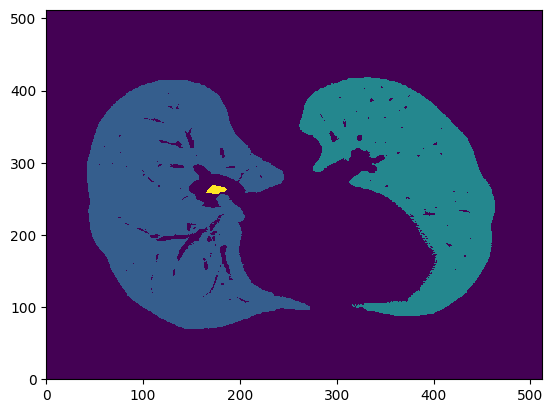

In [34]:
plt.pcolormesh(new_slc)

In [35]:
def keep_top_3(slc):
    new_slc = np.zeros_like(slc)
    rps = regionprops(slc)
    areas = [r.area for r in rps]
    idxs = np.argsort(areas)[::-1]
    for i in idxs[:3]:
        new_slc[tuple(rps[i].coords.T)] = i+1
    return new_slc

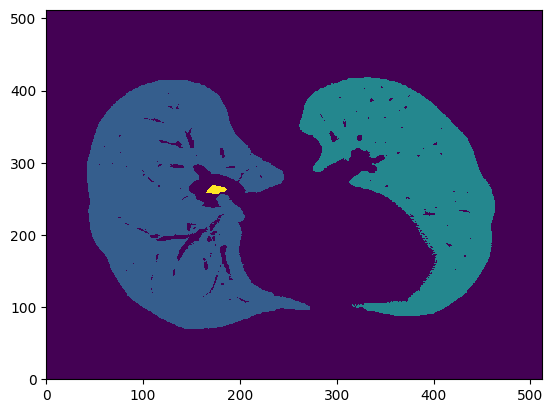

In [36]:
mask_labeled = np.vectorize(keep_top_3, signature='(n,m)->(n,m)')(mask_labeled)
plt.pcolormesh(mask_labeled[50])

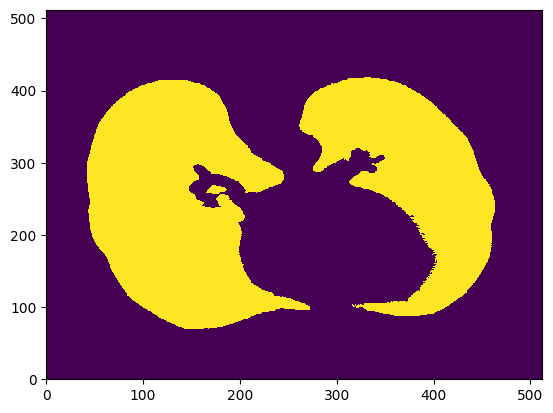

In [37]:
mask = mask_labeled > 0
mask = np.vectorize(ndi.binary_fill_holes, signature='(n,m)->(n,m)')(mask)
plt.pcolormesh(mask[50])

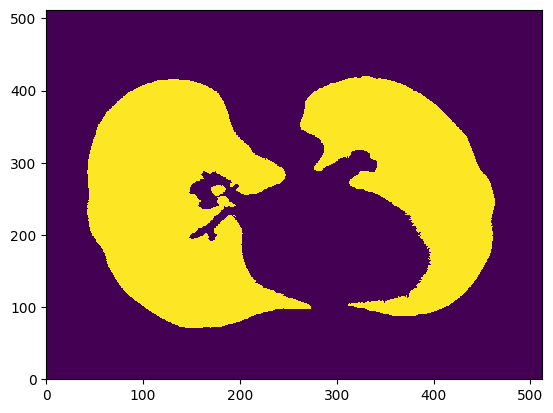

In [38]:
plt.pcolormesh(mask[-50])

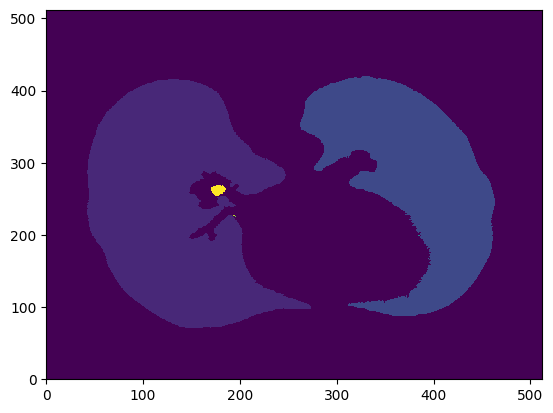

In [39]:
labels = label(mask[-50],connectivity=1,background=0)
plt.pcolormesh(labels)

In [40]:
rps = regionprops(labels)
areas = np.array([r.area for r in rps])
np.where(areas/512**2 < 0.0069)

(array([2, 3, 4, 5, 6, 7, 8]),)

In [41]:
def remove_trachea(slc, c=0.0069):
    new_slc = slc.copy()
    labels = label(slc,connectivity=1,background=0)
    rps = regionprops(labels)
    areas = np.array([r.area for r in rps])
    idxs = np.where(areas/512**2 < c)[0]
    for i in idxs:
        new_slc[tuple(rps[i].coords.T)] = 0
    return new_slc

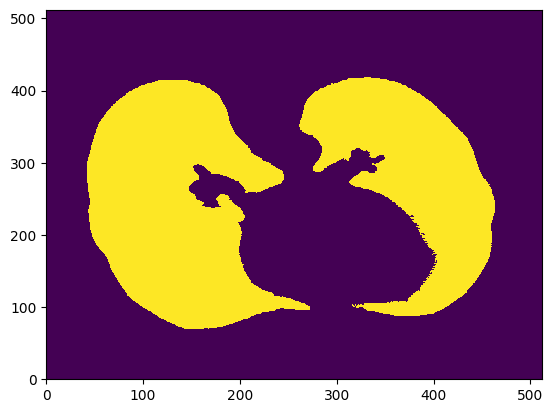

In [42]:
mask = np.vectorize(remove_trachea, signature='(n,m)->(n,m)')(mask)
plt.pcolormesh(mask[50])


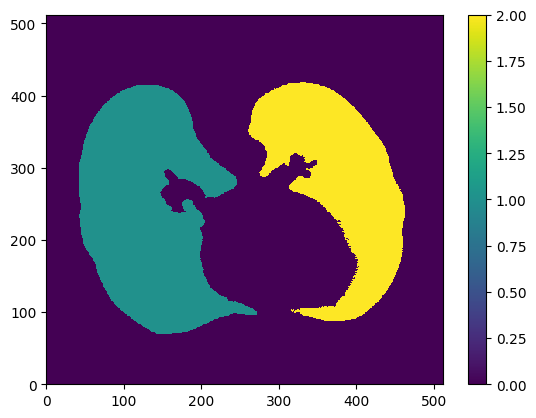

In [43]:
labels = label(mask[50], background=0)
plt.pcolormesh(labels)
plt.colorbar()

In [44]:
center_of_mass(labels==2)[0]

278.6794016390945

Delet Table fonksiyonu bu BT görüntüsünde işe yarmayacaktı çünkü elimizdeki BT görüntülerinde Hasta masaının görüntüde yeri yoktur bu yüzden bu işlemi yapmamız ekstra bir anlam ifade etmeyecektir. Ancak şu an zararı yoktur. Gelebilecek faklı bir BT görütüsü için faydalı olaaktır. 

In [45]:
def delete_table(slc):
    new_slc = slc.copy()
    labels = label(slc, background=0)
    idxs = np.unique(labels)[1:]
    COM_ys = np.array([center_of_mass(labels==i)[0] for i in idxs])
    for idx, COM_y in zip(idxs, COM_ys):
        if (COM_y < 0.3*slc.shape[0]):
            new_slc[labels==idx] = 0
        elif (COM_y > 0.6*slc.shape[0]):
            new_slc[labels==idx] = 0
    return new_slc

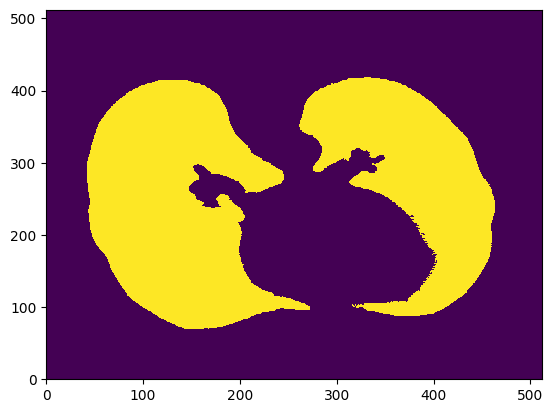

In [46]:
mask_new = np.vectorize(delete_table, signature='(n,m)->(n,m)')(mask)
plt.pcolormesh(mask_new[50])

### binary_dilation()
Görüntü segmentasyon bağlamında, yakın bölgeleri veya nesneleri birleştirmek, boşlukları veya delikleri doldurmak ve genellikle ön plandaki nesnelerin sınırlarını geliştirmek veya değiştirmek için genişleme kullanılabilir. binary_dilation ile elde edilen bianry resim ile orijinal resimin biribrimyle çarpımından elde edilen resim istediğimiz bölgeyi direk bize göstererek direk akciğer görüntüsüne odaklnama imkanı sunar. Ve bu ilgili alan yapay zekanın daha iyi öğrenmesine olanak sağlar. Bu süreçte binary_dilation önemli bir rol almaktadır. 

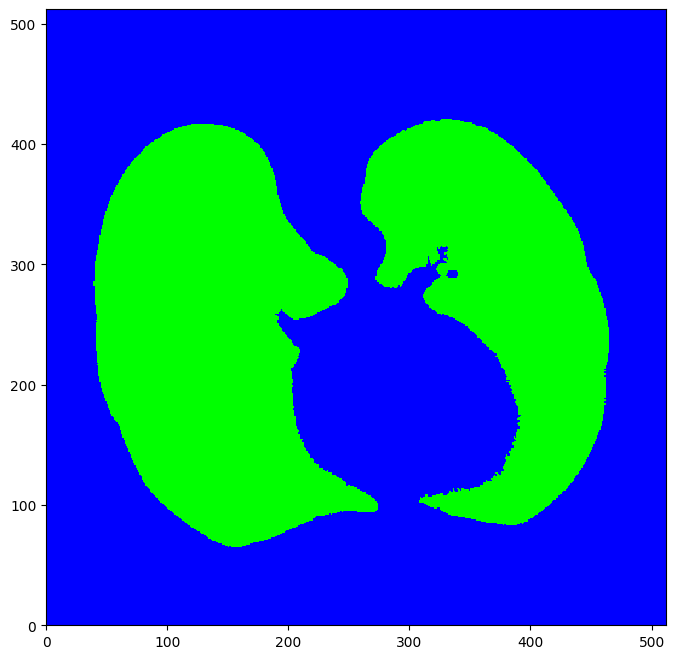

In [47]:
mask_new = binary_dilation(mask_new, iterations=2)
plt.figure(figsize=(8,8))
plt.pcolormesh(mask_new[50], cmap='brg')


###  Segmentasyon İşlemi 

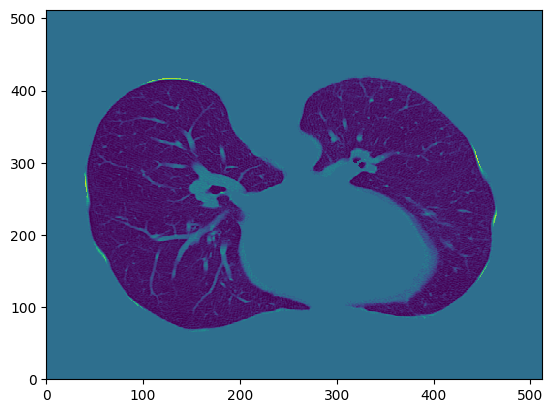

In [48]:
img_new = mask_new * image
plt.pcolormesh(img_new[50])

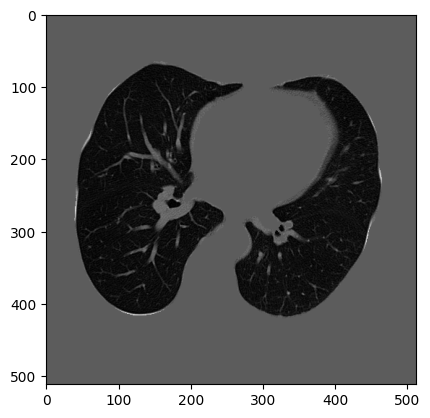

In [49]:
plt.imshow(img_new[50], cmap='gray')


### Son olarak Slice Gösterimi
Üç düzlemi (sırasıyla Eksenel, Koronal ve Sagital) içeren 3 çizimi şimdide BT görüntülerinin segmentasynun sonucu ile bunu gerçekleştirilecektir.

In [50]:

n0, n1, n2 = vol.shape

@widgets.interact(axial_slice=(0,n0-1), coronal_slice=(0,n1-1),\
                  sagittal_slice=(0,n2-1))
def slicer(axial_slice, coronal_slice, sagittal_slice=100):
  fig, ax = plt.subplots(1, 3, figsize=(12, 12))

  # Show the specfied slice on the axial plane with 'gray' color-map
  # and axial aspect ratio.
  
  ax[0].imshow(img_new[axial_slice,:,:], cmap='gray', aspect= axial_asp)
  ax[0].axis('off')
  ax[0].set_title('Axial')

  # Show the specified slice on the coronal plane with 'gray' color-map
  # and coronal aspect ratio.
  ax[1].imshow(img_new[:,coronal_slice,:],cmap='gray', aspect= coronal_asp)
  ax[1].axis('off')
  ax[1].set_title('Coronal')

  # Show the specified slice on the sagittal plane with 'gray' color-map
  # and sagittal aspect ratio.
  ax[2].imshow(img_new[:,:,sagittal_slice], cmap='gray', aspect= sagittal_asp)
  ax[2].axis('off')
  ax[2].set_title('Sagittal')

interactive(children=(IntSlider(value=49, description='axial_slice', max=98), IntSlider(value=255, description…